In [1]:
import numpy as np

x_train = np.arange(1,10)
y_train = np.array([300.0,500.0 ,550.0 ,600.0 ,700.0, 800.0, 820.0 ,900.0, 1000.0 ,1020.0])   #target value
print(x_train)
print(y_train)


[1 2 3 4 5 6 7 8 9]
[ 300.  500.  550.  600.  700.  800.  820.  900. 1000. 1020.]


GRADIENT IS A PARTIAL DERIVATIVE 

In [2]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        
        f_wb = w * x[i] + b 
        
        dj_dw_i = (f_wb - y[i]) * x[i] # weighted sum of error
        dj_db_i = (f_wb - y[i])   # sum of error

        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [ ]:
# regularization gradient

def compute_gradient_regularisation(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    dj_dw += (lambda_/m) * w

    return dj_db, dj_dw

In [3]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    ''' formula to calculate cost or sum of squared errors
    
                cost = 1/2m * sum((f(x_i) - y_i)^2)

                where f(x) = w.x + b
    '''
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    

    return cost/(2*m)

In [4]:
# regularization :
def compute_cost_regularised(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  

    reg_cost = (lambda_/(2*m)) * (w**2)                                 #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [5]:
def train_with_gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            


        # ONLY FOR GRAPHING PURPOSES , NOT REQUIRED FOR GRADIENT DESCENT

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% np.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"( w: {w: 0.3e}, b:{b: 0.5e} )")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

<h3>TRAIN THE MODEL

In [6]:
#TRAIN THE MODEL USING GRADIENT DESCENT

# STEP 1 initialize parameters
w_init = 0
b_init = 0
# SET gradient descent settings
iterations = 20000      # higher the number of iterations ,the better the fit
tmp_alpha = 1.0e-2      # learning rate: 1.0e-2 is a good starting point ,greater values may cause divergence
# run gradient descent
w_final, b_final, J_hist, p_hist = train_with_gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.21e+05  dj_dw: -3.954e+03, dj_db: -6.856e+02   ( w:  3.954e+01, b: 6.85556e+00 )
Iteration 2000: Cost 5.89e+02  dj_dw:  1.450e-01, dj_db: -9.122e-01   ( w:  7.970e+01, b: 2.86123e+02 )
Iteration 4000: Cost 5.87e+02  dj_dw:  2.375e-03, dj_db: -1.494e-02   ( w:  7.901e+01, b: 2.90483e+02 )
Iteration 6000: Cost 5.87e+02  dj_dw:  3.890e-05, dj_db: -2.447e-04   ( w:  7.900e+01, b: 2.90554e+02 )
Iteration 8000: Cost 5.87e+02  dj_dw:  6.371e-07, dj_db: -4.009e-06   ( w:  7.900e+01, b: 2.90556e+02 )
Iteration 10000: Cost 5.87e+02  dj_dw:  1.044e-08, dj_db: -6.567e-08   ( w:  7.900e+01, b: 2.90556e+02 )
Iteration 12000: Cost 5.87e+02  dj_dw:  1.708e-10, dj_db: -1.076e-09   ( w:  7.900e+01, b: 2.90556e+02 )
Iteration 14000: Cost 5.87e+02  dj_dw:  2.375e-12, dj_db: -1.790e-11   ( w:  7.900e+01, b: 2.90556e+02 )
Iteration 16000: Cost 5.87e+02  dj_dw:  6.695e-13, dj_db: -2.804e-12   ( w:  7.900e+01, b: 2.90556e+02 )
Iteration 18000: Cost 5.87e+02  dj_dw:  6.695e-13, dj_db: -2

<b>PLOT GRAPH </b>

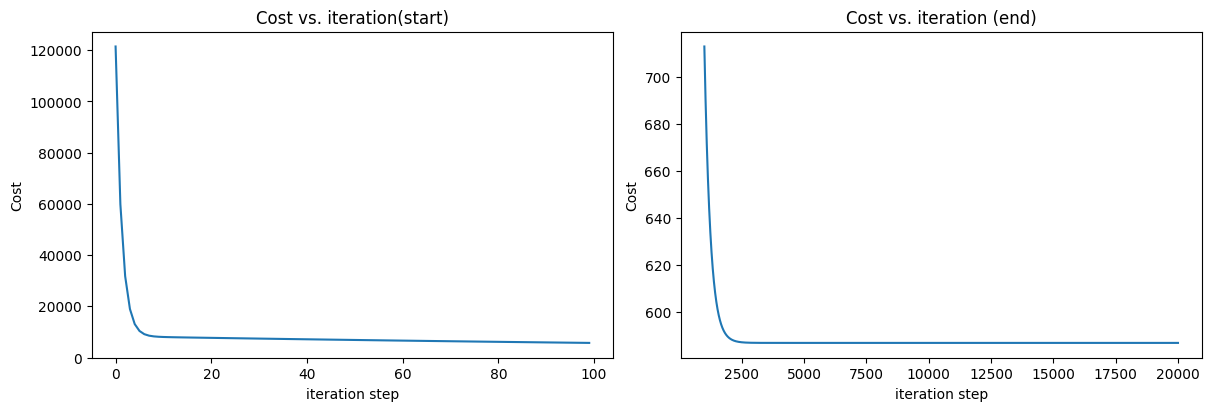

In [7]:
# plot cost versus iteration  
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

ax1.plot(J_hist[:100])  # here we are plotting only the first 100 iterations, ( x axis is implicit ),( y axis is cost)
ax1.set_title("Cost vs. iteration(start)")
ax1.set_xlabel('iteration step') 
ax1.set_ylabel('Cost')  


ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:]) # here we are plotting from 10000th iteration onwards till the end
ax2.set_title("Cost vs. iteration (end)")
ax2.set_ylabel('Cost') 
ax2.set_xlabel('iteration step') 

plt.show()

### Predictions
Now that you have discovered the optimal values for the parameters $w$ and $b$, you can now use the model to predict
housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training
values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [8]:
def predict(x, w, b):
   '''
    Function to predict the price of a house given the size of the house
    Args:
      x (scalar): size of the house
      w (scalar): weight parameter
      b (scalar): bias parameter    
    Returns:
        y_pred (scalar): predicted price of the house
   '''
   y_pred = w*x + b
   return y_pred

print(f"1000 sqft house prediction {predict(1,w_final,b_final):0.1f} Thousand dollars")
print(f"2000 sqft house prediction {predict(1.5,w_final,b_final):0.1f} Thousand dollars")
print(f"3000 sqft house prediction {predict(2,w_final,b_final):0.1f} Thousand dollars")

1000 sqft house prediction 369.6 Thousand dollars
2000 sqft house prediction 409.1 Thousand dollars
3000 sqft house prediction 448.6 Thousand dollars
